In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

from setup.univ_setup import *
from setup.utils import *

from factor_mining.factors.revised_momentum import *


In [2]:
### universe setup ###
datadir = '/home/derek-qi/Documents/R3000_Data/data/r3000/'
univ = univ_setup(datadir, silent=False)
filt_na(univ)
import warnings
warnings.filterwarnings("ignore")

Setup R3000 universe
use existing binary file
0.456255 seconds


In [3]:
__author__ = 'Derek Qi'

import numpy as np
import pandas as pd
from pdb import set_trace

def _rmmt_sn(log_return, head, tail, c=0.5):
    assert head < tail, "head %d is greater than or equal to tail" % (head, tail)
    y = np.array([0] * head + [1] * (tail - head))
    y = y / np.sum(y)
    rmmt = np.convolve(log_return, y) - c * np.convolve(np.abs(log_return), y)
    # rmmt = np.convolve(log_return, y) / np.sqrt(np.convolve(log_return ** 2, y)) # momentum for unit variance within the same period
    return rmmt[:-tail+1]


def revised_momentum(univ_table, head, tail, c=0.5, naming='simple'):

    name = 'revised_momentum'
    if naming == 'full':
        name += '_%s_%s' % (head, tail)
    univ_table[name] = np.nan
    univ_table.reset_index(['date', 'ticker'])

    rmmt_dict = {}
    datelst = np.unique(univ_table['date'])
    allTickers = np.unique(univ_table['ticker'])
    for ticker in allTickers:
        table = univ_table[univ_table.ticker == ticker]
        lr = np.diff(np.log(table['price'])) # log return series
        lr = np.insert(lr, 0, 0)
        lr = np.nan_to_num(lr)
        rmmt = _rmmt_sn(lr, head, tail, c)
        rmmt = np.nan_to_num(rmmt)
        # set_trace()
        univ_table.loc[univ_table.ticker == ticker, name] = rmmt

    for t in datelst:
        table = univ_table[univ_table.date == t][['date', 'ticker', name]].copy()
        # set_trace()
        # table = table.reset_index()
        table.dropna(inplace = True)
        rmmt_dict[t] = table
    return rmmt_dict


In [4]:
univ_table = stack(univ)
selTickers = ['AMZN', 'NVDA', 'FB',
              'TSLA', 'IBM', 'GM']
# selTickers = np.unique(univ_table.ticker)[:1000]
univ_table = univ_table[univ_table.ticker.isin(selTickers)]

In [5]:
# univ_table = univ_table.set_index(['date', 'ticker'])

In [6]:
rmmt_dict = revised_momentum(univ_table, 4, 52, c=0.5)

KeyError: 'Level date must be same as name (None)'

In [22]:
rmmt_table = stack(rmmt_dict)

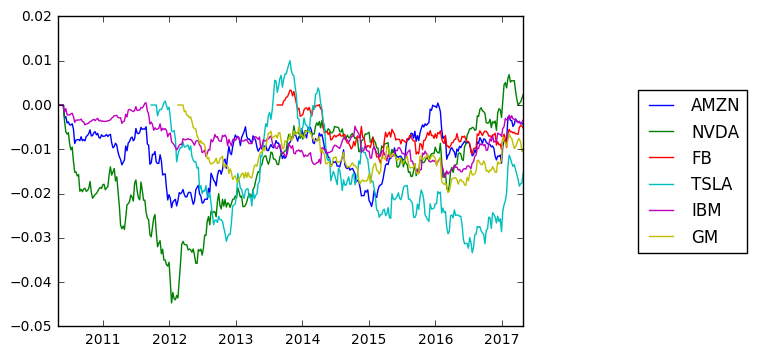

In [23]:
for ticker in selTickers:
    table = univ_table[univ_table.ticker == ticker]
    plt.plot(pd.to_datetime(table.date), table.revised_momentum, label=ticker)
plt.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5))
plt.show()

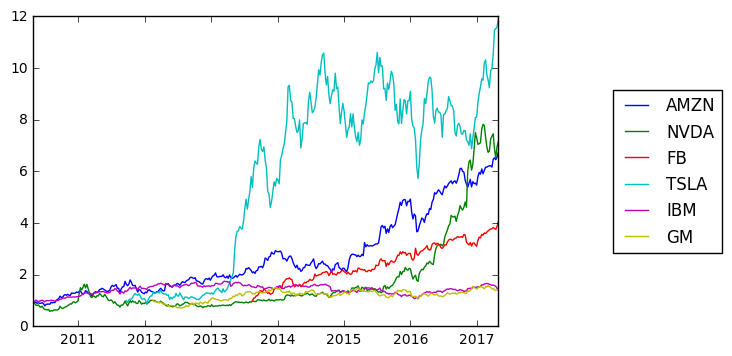

0.37056593067


In [11]:
tickers = ['AMZN', 'NVDA', 'FB',
              'TSLA', 'IBM', 'GM']
for ticker in tickers:
    table = univ_table[univ_table.ticker == ticker]
    table = table.iloc[:,:]
    plt.plot(pd.to_datetime(table.date), table.price / table.price.iloc[0], label=ticker)
plt.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5))
plt.show()
print(np.log(table.price.iloc[-1] / table.price.iloc[0]))

In [ ]:
get_val(rmmt_dict, 350)